# Perform EDA on below insurance dataset

Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

Perform All steps of EDA and document conclusions and then perform feature engineering.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('insurance_data.csv')
print(df.shape)
df.head()

(1340, 11)


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [72]:
(df.isnull().sum() / df.shape[0] * 100).reset_index().rename(columns={0:'missing_values(%)'})

,index,missing_values(%)
0,PatientID,0.000000
1,age,0.373134
2,gender,0.000000
3,bmi,0.000000
4,bloodpressure,0.000000
5,diabetic,0.000000
6,children,0.000000
7,smoker,0.000000
8,region,0.223881
9,claim,0.000000


## Columns
numerical 
- PatientID, bmi, age, blood pressure, children, claim

categorical
- gender, diabetic, smoker, region

mixed
- none

### Categorical cols

#### gender

conclusions
- They both share almost the same number of rows 

In [18]:
df.drop(columns='index', inplace=True)

In [19]:
df['gender'].value_counts()

gender
male      678
female    662
Name: count, dtype: int64

<Axes: xlabel='gender'>

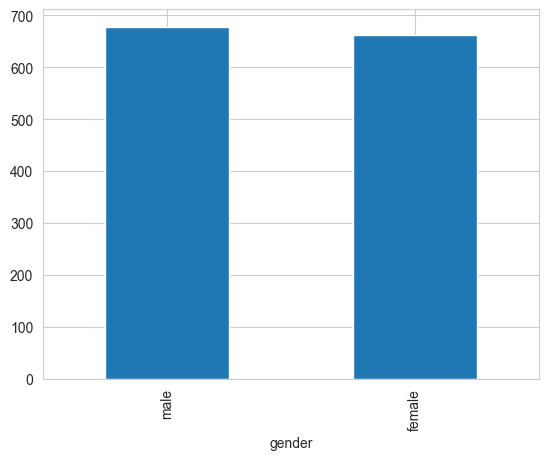

In [20]:
df['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

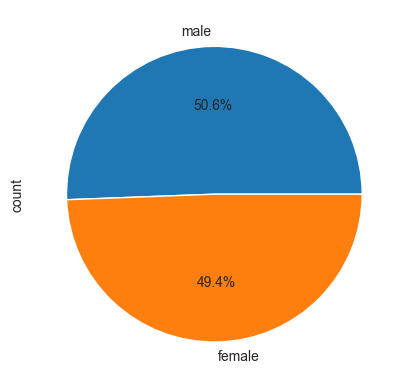

In [21]:
df['gender'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### diabetic

conclusion
- They both share almost the same number of rows

<Axes: xlabel='diabetic'>

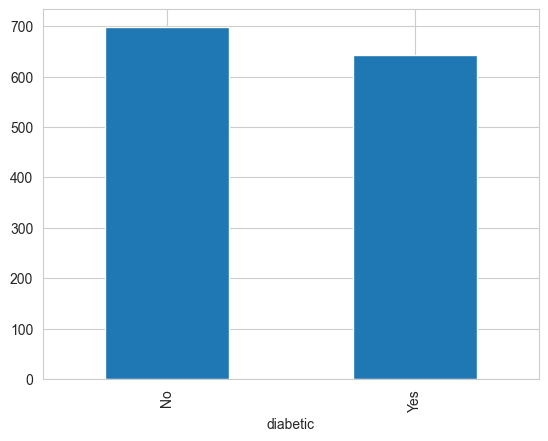

In [22]:
df['diabetic'].value_counts().plot(kind='bar')

#### smoker

conclusion
- Non-smokers are high in number, they take about 80%

<Axes: xlabel='smoker'>

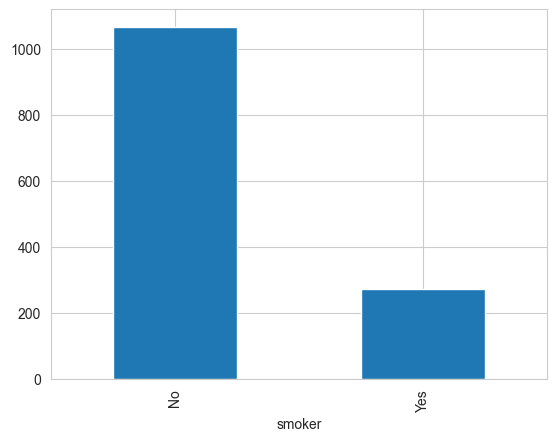

In [23]:
df['smoker'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

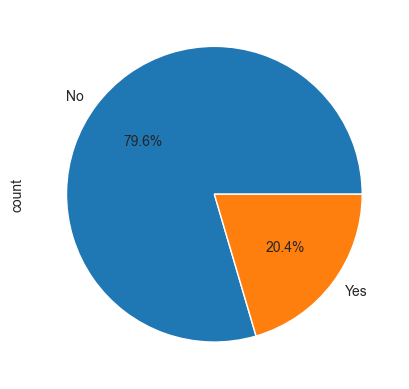

In [24]:
df['smoker'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### region


conclusion
- southeast has the highest % share of 33%
- Northwest and southwest are almost equal

<Axes: xlabel='region'>

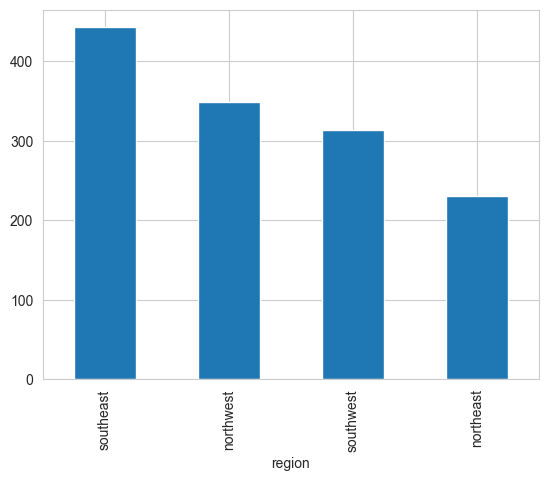

In [25]:
df['region'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

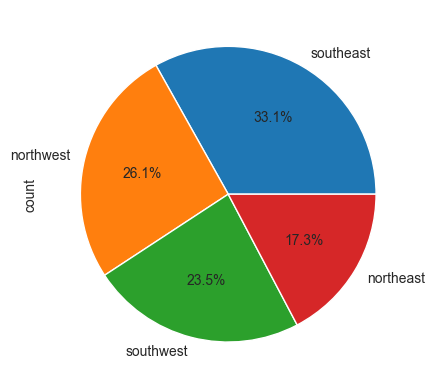

In [26]:
df['region'].value_counts().plot(kind='pie', autopct='%0.1f%%')

### Analysis of numerical cols
- PatientID, bmi, age, blood pressure, children, claim

#### bmi

conclusions
- much of the bmi values lie between 27 and 34
- there are few outliers, which are more than 47

In [27]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

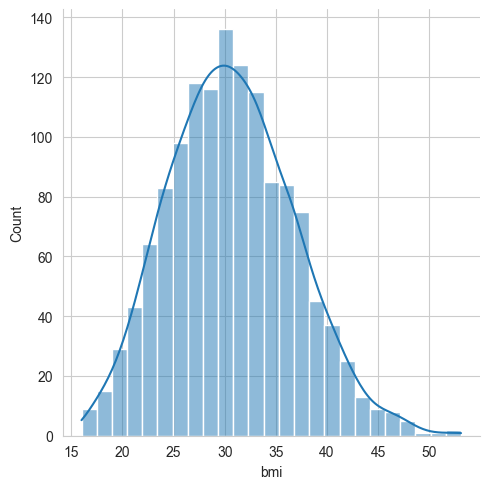

In [28]:
sns.displot(df, kind='hist', x='bmi', kde=True)

<Axes: ylabel='bmi'>

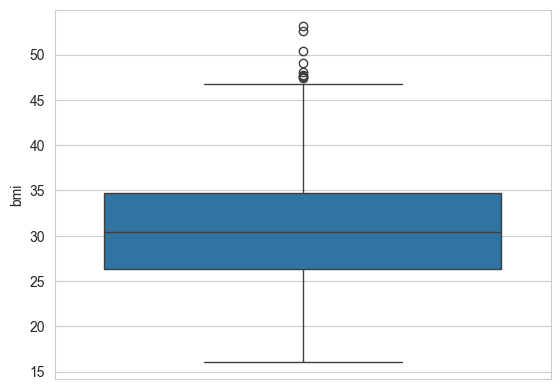

In [30]:
sns.boxplot(df['bmi'])

In [31]:
df[df['bmi'] > 47]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
141,142,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
579,580,25.0,male,47.5,84,Yes,1,No,southeast,8083.92
675,676,49.0,female,48.1,81,Yes,2,No,northeast,9432.93
696,697,49.0,male,47.7,88,No,1,No,southeast,9748.91
802,803,42.0,male,49.1,109,Yes,0,No,southeast,11381.33
1299,1300,50.0,male,52.6,110,No,1,Yes,southeast,44501.40
1306,1307,43.0,female,47.6,112,Yes,2,Yes,southwest,46113.51
1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


#### age

conclusions
- no outliers
- bi-modal
- many people fall in age 32 and 45
- 5 missing values

In [32]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

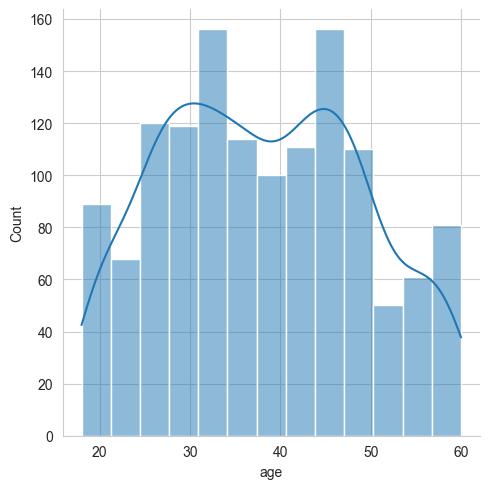

In [33]:
sns.displot(df, kind='hist', x='age', kde=True)

<Axes: ylabel='age'>

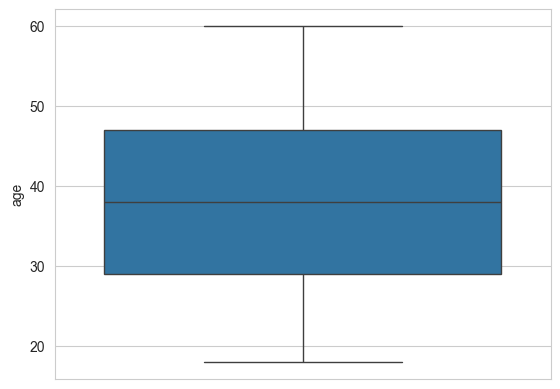

In [34]:
sns.boxplot(df['age'])

In [36]:
df['age'].isnull().sum()

5

#### bloodpressure

conclusions
- skewed data
- one max value is there which 140
- There are many outliers lying above 118, which should be checked later

In [35]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

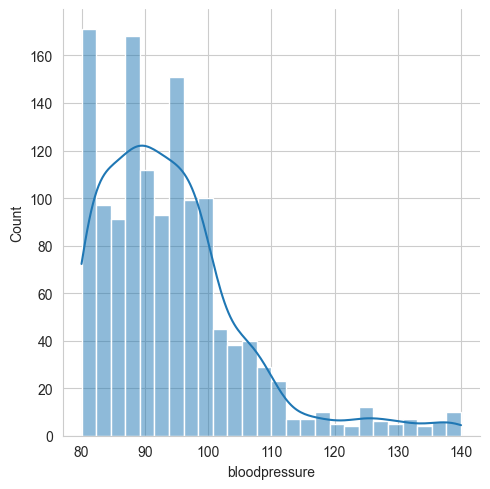

In [37]:
sns.displot(df, kind='hist', kde=True, x='bloodpressure')

<Axes: ylabel='bloodpressure'>

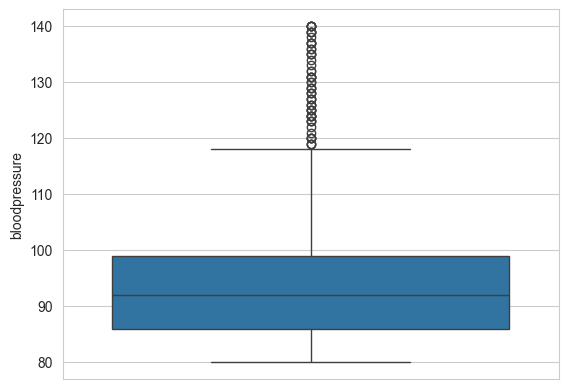

In [38]:
sns.boxplot(df['bloodpressure'])

In [43]:
df[df['bloodpressure'] > 135]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1156,1157,46.0,female,23.0,137,Yes,0,Yes,southeast,27037.91
1161,1162,22.0,male,22.4,137,Yes,2,No,northeast,27375.90
1174,1175,44.0,female,29.1,139,No,0,Yes,northwest,29141.36
1196,1197,36.0,female,31.4,136,Yes,0,Yes,southwest,34166.27
1197,1198,30.0,male,31.1,136,No,0,Yes,northeast,34254.05
1210,1211,25.0,male,30.8,140,Yes,0,Yes,southwest,35491.64
1225,1226,50.0,female,34.8,140,Yes,2,No,southwest,36910.61
1226,1227,46.0,male,35.5,140,Yes,0,Yes,southeast,36950.26
1230,1231,58.0,female,30.8,139,No,0,Yes,northeast,37270.15
1242,1243,27.0,female,36.7,140,No,2,Yes,northeast,38511.63


In [44]:
df['bloodpressure'].skew()

1.4835342102293079

#### children

- majority of the patients have 0, 1, or 2 childs
- few outliers with 5 children (18 rows)

In [45]:
df['children'].describe()

count    1340.000000
mean        1.093284
std         1.205334
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

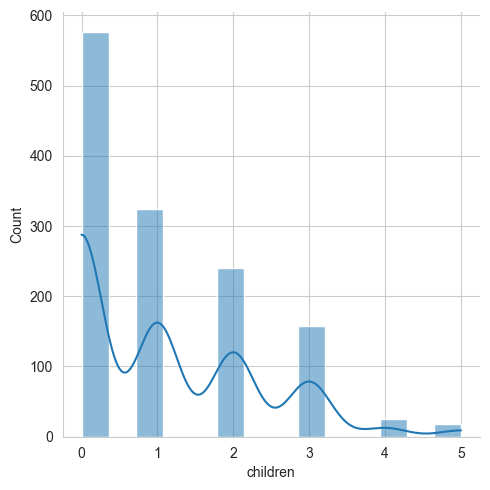

In [46]:
sns.displot(df, x='children', kind='hist', kde=True)

<Axes: ylabel='children'>

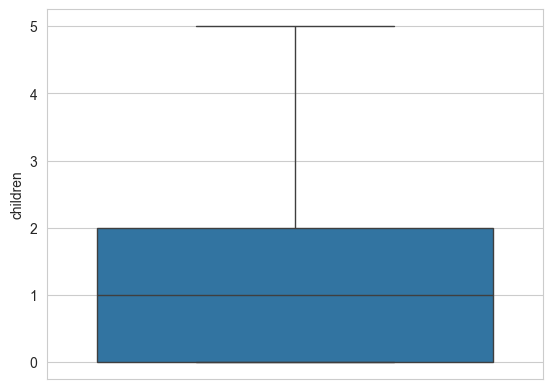

In [47]:
sns.boxplot(df['children'])

In [50]:
df[df['children'] > 3]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
315,316,44.0,male,33.7,96,No,4,No,southeast,4504.66
321,322,43.0,female,31.4,99,No,4,No,southeast,4561.19
332,333,46.0,female,28.6,80,No,5,No,southwest,4687.80
346,347,55.0,female,37.0,83,Yes,5,No,southwest,4830.63
349,350,47.0,male,26.7,93,No,4,No,northwest,4877.98
355,356,38.0,male,30.1,87,No,5,No,southeast,4915.06
366,367,24.0,male,23.9,84,No,5,No,southwest,5080.10
407,408,31.0,male,24.3,83,Yes,5,No,southwest,5615.37
413,414,43.0,female,25.6,82,No,4,No,southwest,5708.87
431,432,38.0,male,29.4,96,No,4,No,southwest,6059.17


#### claim

conclusions
- there are few people who have claimed 64,000. Which could be outliers
- there are outliers above 50000
- Majority of them lie between 0 - 14000

In [51]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

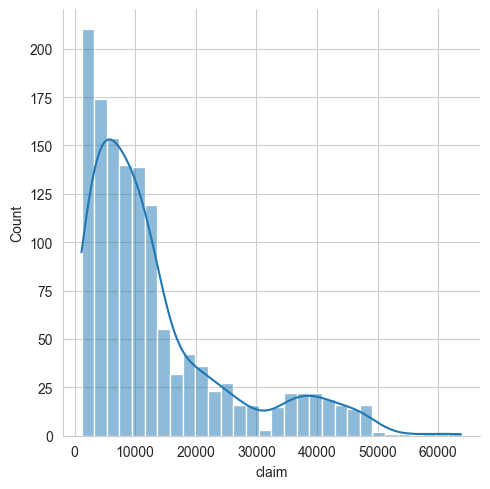

In [52]:
sns.displot(df, x='claim', kind='hist', kde=True)

<Axes: ylabel='claim'>

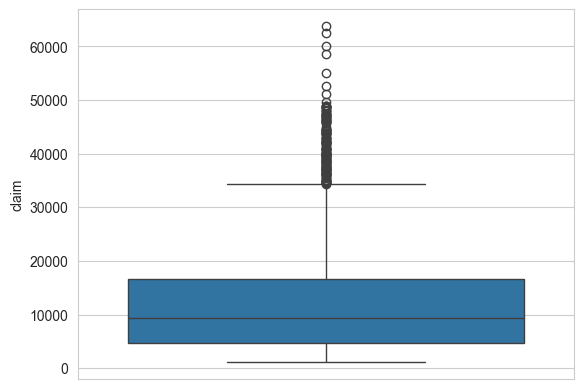

In [53]:
sns.boxplot(df['claim'])

## Bi-Variate Analysis

- Selecting claim with other cols

In [54]:
df.columns

Index(['PatientID', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic',
       'children', 'smoker', 'region', 'claim'],
      dtype='object')

#### claim vs age

- not much to conclude from here, all aged people were claiming equally.

<Axes: xlabel='age', ylabel='claim'>

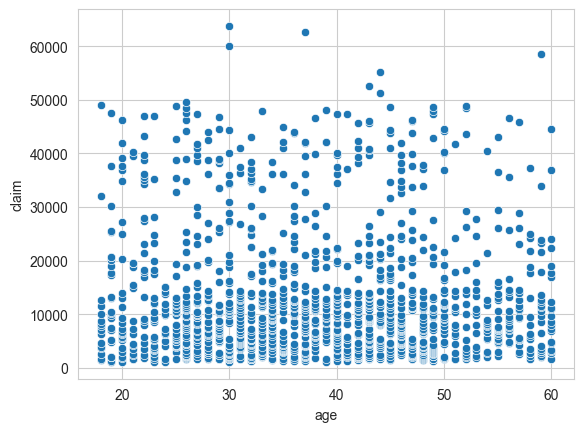

In [55]:
sns.scatterplot(df, x='age', y='claim')

#### claim vs gender

- we can notice, males were claiming slightly more amount than the females

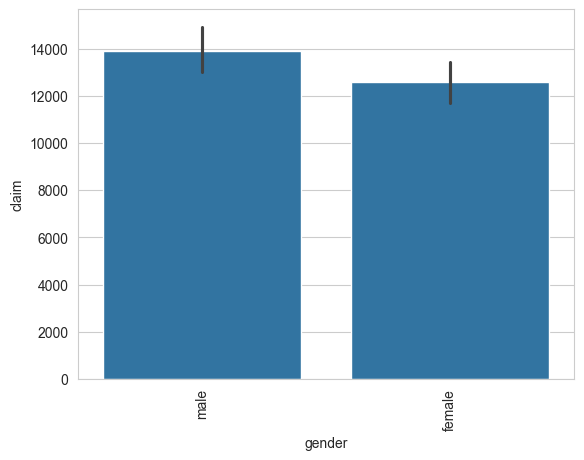

In [57]:
sns.barplot(df, x='gender', y='claim')
plt.xticks(rotation='vertical')
plt.show()

#### claim vs bmi

conclusions
- it is noted that as soon as 30 bmi is crossed, there are few chances that the patient can claim more than 30k
- But less than 30 bmi, do not exceed 30k

<Axes: xlabel='bmi', ylabel='claim'>

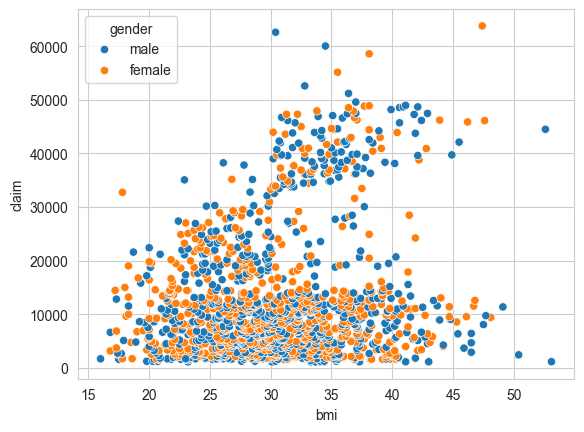

In [60]:
sns.scatterplot(df, x='bmi', y='claim', hue='gender')

#### claim vs bloodpressure

conclusions
- It is noted that patients with bloodpressure more than 100 and less than 111 have claimed more than 9k
- and bloodpressure more than 111 will claim a minimum of 25k
- majority of the patients with bloodpressure lying between 80 and 100 will not cross 20k

<Axes: xlabel='bloodpressure', ylabel='claim'>

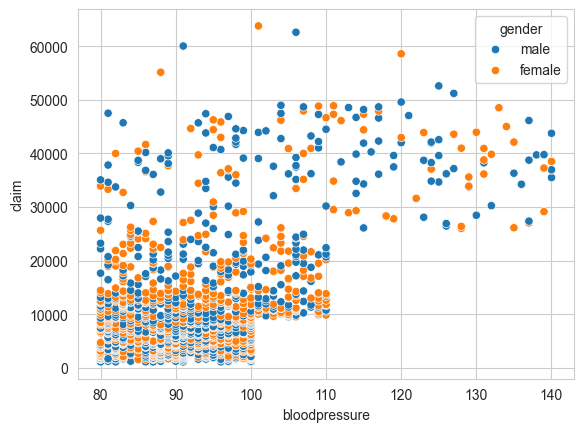

In [62]:
sns.scatterplot(df, x='bloodpressure', y='claim', hue='gender')

#### claim vs diabetic

conclusions
- they both share the same amount of average claims

<Axes: xlabel='diabetic', ylabel='claim'>

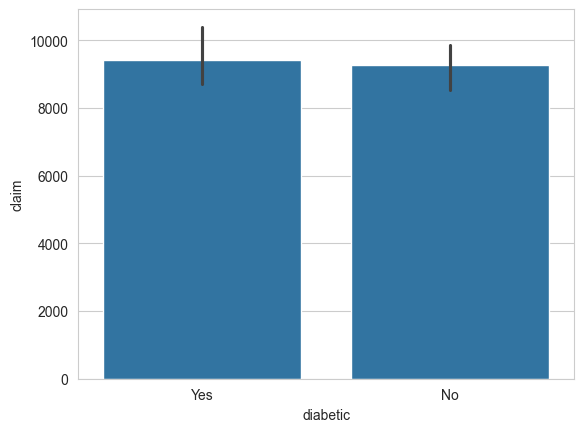

In [63]:
sns.barplot(df, x='diabetic', y='claim', estimator=np.median)

#### claim vs children
- Although it is uniformly distributed, but there are a high chance of claiming more money if the patient has 4 children 

<Axes: xlabel='children', ylabel='claim'>

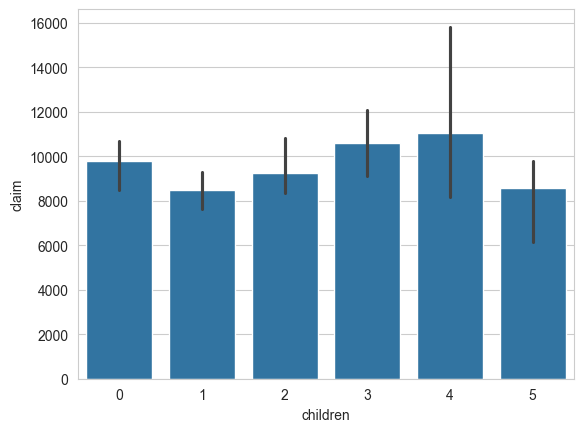

In [64]:
sns.barplot(df, x='children', y='claim', estimator=np.median)

#### claim vs smoker

conclusions
- A smoker is most likely claim around 30-37k  

<Axes: xlabel='smoker', ylabel='claim'>

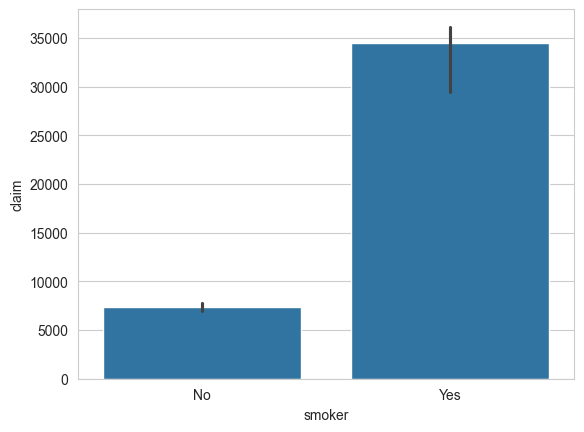

In [66]:
sns.barplot(df, x='smoker', y='claim', estimator=np.median)

#### claim vs region

conclusions
- The people belonging to northeast have more claim amount than the rest.
- others fall between 6.7k to 9k

<Axes: xlabel='region', ylabel='claim'>

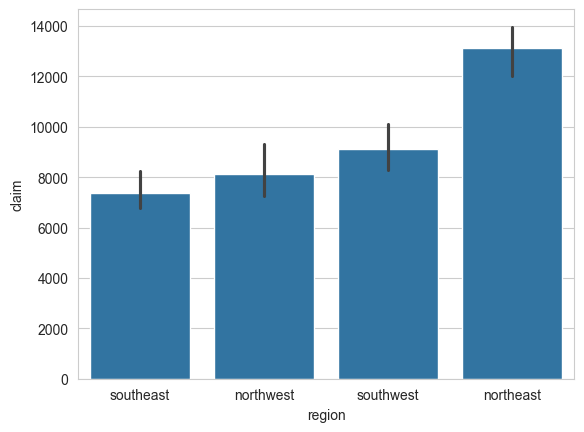

In [68]:
sns.barplot(df, x='region', y='claim', estimator=np.median)